In [26]:
import datetime as dt

In [27]:
import yfinance as yf

In [50]:
import pandas as pd

In [52]:
import matplotlib

In [29]:
tickers = ['AMZN', 'TSLA', 'NVDA', 'UNA']
close_prices = pd.DataFrame()

In [30]:
attempt = 0

In [31]:
drop = []

In [32]:
while len(tickers) != 0 and attempt <=5:
    tickers = [j for j in tickers if j not in drop]
    for i in range(len(tickers)):
        try:
            temp = yf.download(tickers[i], dt.datetime.today() - dt.timedelta(3650), dt.datetime.today())
            temp.dropna(inplace=True)
            close_prices[tickers[i]] = temp['Adj Close']
            drop.append(tickers[i])
        except Exception as e:
            print(tickers[i], " :failed to fetch data", e)
    attempt += 1
            

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [33]:
close_prices.fillna(method='bfill', axis=0, inplace=True)

In [35]:
close_prices.dropna(axis=0, inplace=True)

In [36]:
close_prices.mean()

AMZN    772.324388
TSLA    207.705382
NVDA     82.828300
dtype: float64

In [37]:
close_prices.median()

AMZN    436.654999
TSLA    217.674995
NVDA     21.682998
dtype: float64

In [38]:
close_prices.std()

AMZN    647.886080
TSLA    161.205044
NVDA     91.798743
dtype: float64

In [39]:
daily_returns = close_prices.pct_change()

In [40]:
daily_returns.mean()

AMZN    0.001443
TSLA    0.002075
NVDA    0.001793
dtype: float64

In [41]:
daily_returns.median()

AMZN    0.001215
TSLA    0.000871
NVDA    0.001372
dtype: float64

In [42]:
daily_returns.std()

AMZN    0.019760
TSLA    0.034499
NVDA    0.026644
dtype: float64

In [43]:
daily_returns.rolling(window=20).mean()

,AMZN,TSLA,NVDA
Date,,,
2010-06-28,NaN,NaN,NaN
2010-06-29,NaN,NaN,NaN
2010-06-30,NaN,NaN,NaN
2010-07-01,NaN,NaN,NaN
2010-07-02,NaN,NaN,NaN
...,...,...,...
2020-06-16,0.003867,0.010145,0.002132
2020-06-17,0.003883,0.010982,0.002739
2020-06-18,0.003137,0.011128,0.001708


In [46]:
daily_returns.ewm(span=20, min_periods=20).mean()

,AMZN,TSLA,NVDA
Date,,,
2010-06-28,NaN,NaN,NaN
2010-06-29,NaN,NaN,NaN
2010-06-30,NaN,NaN,NaN
2010-07-01,NaN,NaN,NaN
2010-07-02,NaN,NaN,NaN
...,...,...,...
2020-06-16,0.004822,0.010543,0.004274
2020-06-17,0.005299,0.010475,0.005626
2020-06-18,0.005263,0.010646,0.004905


In [47]:
daily_returns.ewm(span=20, min_periods=20).std()

,AMZN,TSLA,NVDA
Date,,,
2010-06-28,NaN,NaN,NaN
2010-06-29,NaN,NaN,NaN
2010-06-30,NaN,NaN,NaN
2010-07-01,NaN,NaN,NaN
2010-07-02,NaN,NaN,NaN
...,...,...,...
2020-06-16,0.017416,0.044174,0.028739
2020-06-17,0.016634,0.042019,0.027668
2020-06-18,0.015823,0.039971,0.026417


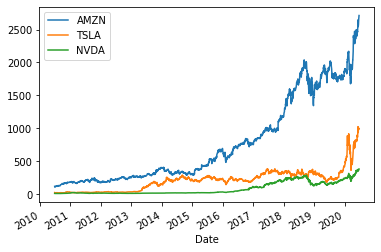

In [53]:
close_prices.plot()

In [54]:
# Results are super messy - standardise the prices for comparision using the z score

In [55]:
cp_standardised = (close_prices - close_prices.mean())/ close_prices.std()

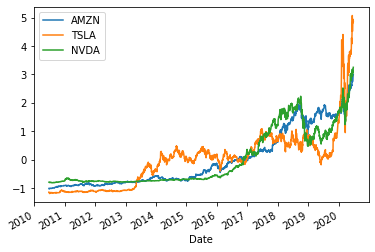

In [57]:
cp_standardised.plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1fbb0f6f10>,
      dtype=object)

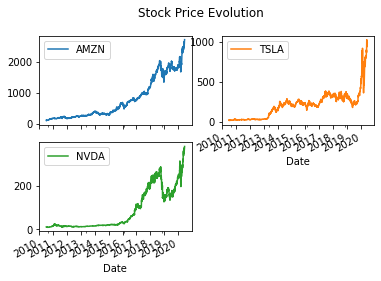

In [59]:
close_prices.plot(subplots=True, layout= (2,2), title='Stock Price Evolution')